In [12]:
import pandas as pd
import numpy as np
#1
data = pd.read_csv("diabetes_.csv")
data.head()
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#2
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
#4
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split(X, y , test_size= 0.3 , random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)
  test_split_size = int (len(X) * test_size)
  train_indices= indices[:test_split_size]
  test_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices] , X[test_indices]
  y_train, y_test = y[train_indices] , y[test_indices]
  return X_train, X_test, y_train, y_test


In [15]:
#4

def euclid_distance(point1 , point2):
  #Computing distance using euclidean distance formula
  if point1.shape != point2.shape:
    raise ValueError("Points dimention must be same")
  else:
    distance = np.sqrt(np.sum((point1-point2)**2))
    return distance


def knn_single_query(query, X_train, y_train, k=5):
  #Algorithm for predicting class for a single query
  distances = [euclid_distance(query,x) for x in X_train]
  sorted_index = np.argsort(distances)
  nearest_index = sorted_index[:k]
  nearest_labels = y_train[nearest_index]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

def knn_test_sample(X_test , X_train, y_train, k=5):
  #Algorithm for predicting class for all test sample
  predictions = [knn_single_query(x,X_train,y_train , k ) for x in X_test]
  return np.array(predictions)



def calculate_accuracy (y_test,y_pred):
  #Calculation accuracy of the outcome or algorithm
  correct_prediction = np.sum(y_test==y_pred)
  total_prediction = len(y_pred)
  accuracy = correct_prediction/total_prediction * 100
  return accuracy


X_train,X_test,y_train,y_test = train_test_split(X,y)

knn_prediction = knn_test_sample(X_test[:20],X_train , y_train, k=17)
actual_label = y_test[:20]

print("KNN algorithm prediction: ",knn_prediction)
print("Actual Label: ",actual_label)


KNN algorithm prediction:  [0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
Actual Label:  [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]


In [16]:

#problem2
#1.
X_scaled = (X - X.min())/(X.max()-X.min())

Xs_train,Xs_test,y_train,y_test = train_test_split(X_scaled,y)

scaled_prediction = knn_test_sample(Xs_test[:20],Xs_train,y_train, k = 17)
actual_label_scale = y_test[:20]

print("KNN algorithm prediction: ",scaled_prediction)
print("Actual Label: ",actual_label_scale)


#2.
print("Accuracy of original dataset : ",calculate_accuracy(actual_label,knn_prediction),"%")
print("Accuracy of original dataset : ",calculate_accuracy(actual_label_scale,scaled_prediction),"%")


KNN algorithm prediction:  [0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
Actual Label:  [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
Accuracy of original dataset :  85.0 %
Accuracy of original dataset :  85.0 %


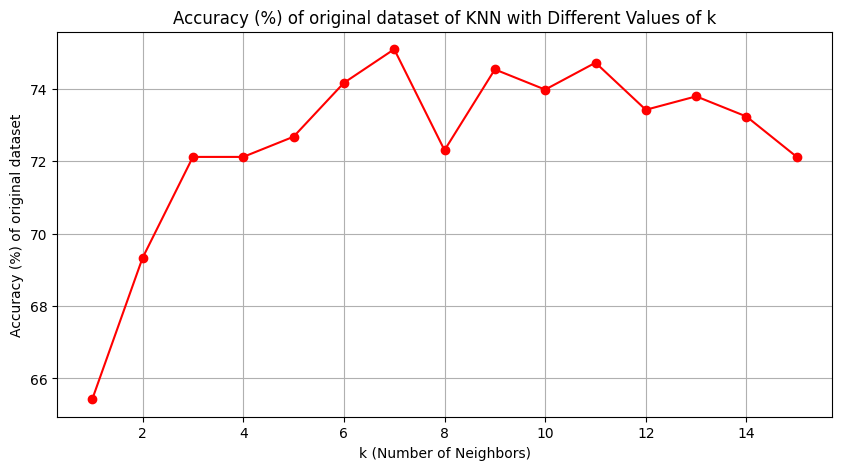

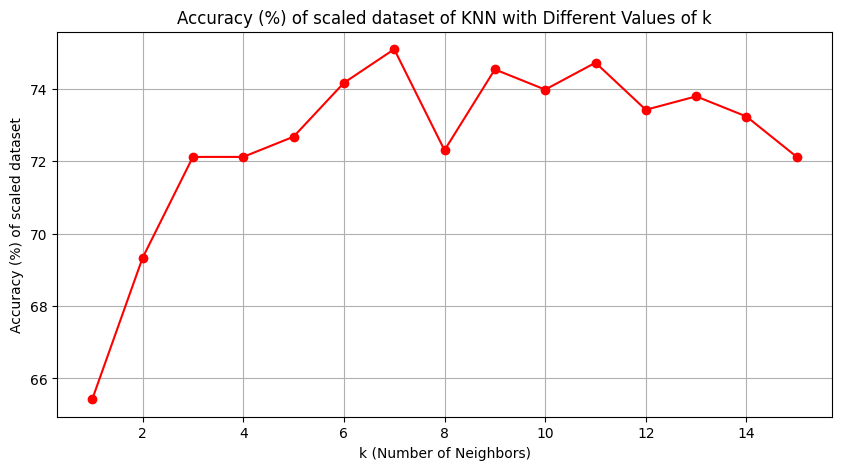

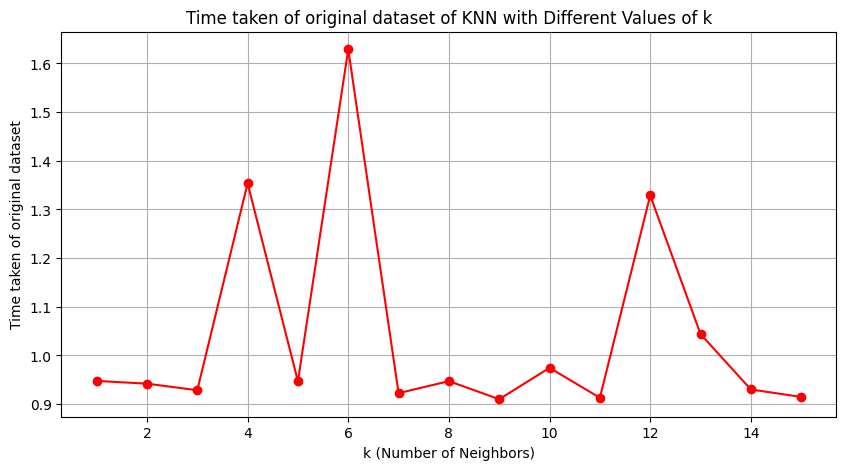

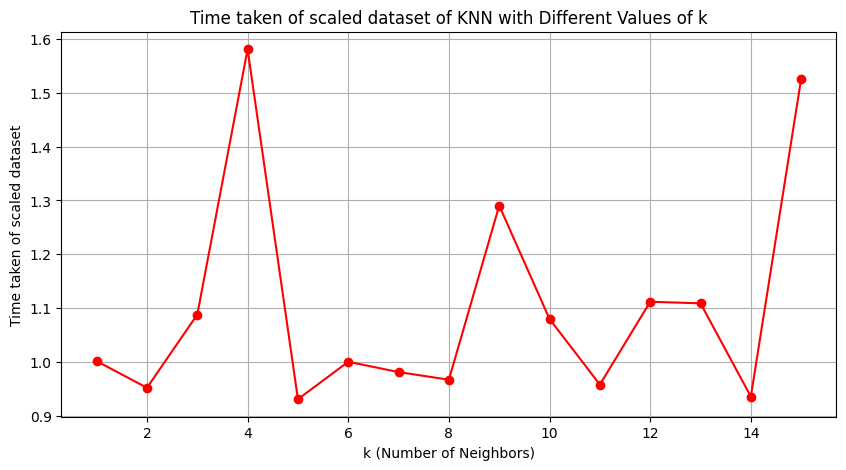

In [18]:

#Problem 3
#1.
from timeit import timeit

#for accuracy and time
def exp_knn_k_values(X_train,y_train,X_test,y_test,k_values):

  accuracies= {}
  times={}

  for k in k_values:
    prediction = knn_test_sample(X_test,X_train,y_train,k)

    times[k]=timeit(lambda:knn_test_sample(X_test,X_train,y_train,k),number = 1)

    accuracy=calculate_accuracy(y_test,prediction)
    accuracies[k]=accuracy

  return accuracies, times


#2
import matplotlib.pyplot as plt
def plot_diff_k(items,k_values,description):
  plt.figure(figsize=(10,5))
  plt.plot(k_values,list(items.values()),color='red' )
  plt.xlabel('k (Number of Neighbors)')
  plt.ylabel(description)
  plt.title(f'{description} of KNN with Different Values of k')
  plt.grid(True)
  plt.show()

k_values=range(1,16)
accuracy, timetaken = exp_knn_k_values(X_train,y_train,X_test,y_test,k_values)
scaled_accuracy, scaled_timetaken = exp_knn_k_values(Xs_train,y_train,Xs_test,y_test,k_values)

#for original dataset
plot_diff_k(accuracy,k_values, "Accuracy(%) of original dataset")

#for scaled dataset
plot_diff_k(scaled_accuracy,k_values, "Accuracy(%) of scaled dataset")

#timetaken graph for original dataset
plot_diff_k(timetaken, k_values, "Time taken of original dataset")

#timetaken graph for scaled dataset
plot_diff_k(scaled_timetaken, k_values, "Time taken of scaled dataset")